# Ydata Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension.

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS):

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.
import numpy as np
class Ols(object):
  def __init__(self):
    self.w = None

  @staticmethod
  def pad(X):
    pass

  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    self.w = np.linalg.pinv(X.T@X)@X.T@Y


  def _fit(self, X, Y):
    # optional to use this
    pass

  def predict(self, X):
    #return wx
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    w = self.w
    w = np.expand_dims(w,axis=-1)
    return X@w

  def _predict(self, X):
    # optional to use this
    pass

  def score(self, X, Y):
    #return MSE
    if X.ndim == 1:
      X = np.expand_dims(X,axis=-1)
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    n = Y.shape[0]
    w = self.w
    #w = np.expand_dims(w,axis=-1)
    return np.sum((X @ w - Y)**2)/n

In [3]:
import pandas as pd
np.random.seed(42)
data = pd.read_csv('/content/Boston-house-price-data.csv')
data.head()
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
#X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = Ols();
model.fit(X_train,Y_train);
model.predict(X_test);
print(model.score(X_train,Y_train))
model.score(X_test,Y_test)


22.545481487421423


21.51744423120909

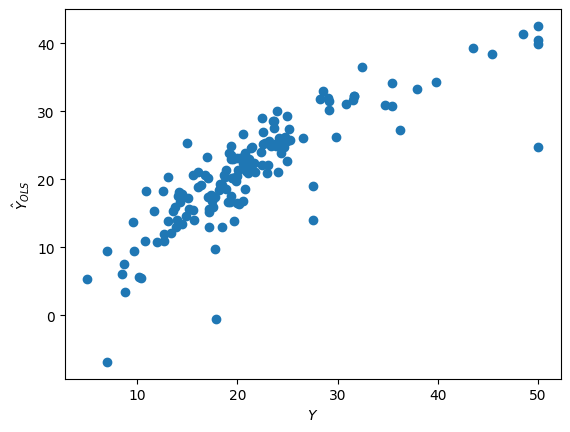

In [5]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, model.predict(X_test));
plt.xlabel('$Y$')
plt.ylabel('$\hat{Y}_{OLS}$');


In [6]:
mse_train = []
mse_test = []
for i in range(20):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
  model = Ols();
  model.fit(X_train,Y_train);
  model.predict(X_test);
  #w=model.w
  #w = np.expand_dims(w,axis=-1)
  #print(np.sum((X_test@w-Y_test)**2)/Y_test.size)
  #print(np.sum((X_train@w-Y_test)**2)/Y_train.size)
  mse_train.append(model.score(X_train,Y_train))
  mse_test.append(model.score(X_test,Y_test))
  #print(model.w)

#w=model.w
#w = np.expand_dims(w,axis=-1)
#print(w)
#print(np.sum((X_test@w-Y_test)**2)/Y_test.size)
#print(np.sum((X_train@w-Y_test)**2)/Y_train.size)
print('MSE on test:',sum(mse_test)/len(mse_test))
print('MSE on train:',sum(mse_train)/len(mse_train))
#Y_train, model.predict(X_train)
#Y_test, model.predict(X_test)


MSE on test: 25.507532313877245
MSE on train: 21.19393351376658


In [7]:
from scipy import stats
stats.ttest_rel(mse_train, mse_test)

TtestResult(statistic=-2.3227663224081145, pvalue=0.03144792965171587, df=19)

In [8]:
# Write a new class OlsGd which solves the problem using gradinet descent.
# The class should get as a parameter the learning rate and number of iteration.
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate?
# How would you find number of iteration automatically?
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    pass

  def fit(self, X):
    #self.X_min = X.T.min(axis=1)
    #self.X_max = X.T.max(axis=1)
    self.X_mean = X.T.mean(axis=1)
    self.X_std = X.T.std(axis=1)


  def predict(self, X):
    #apply normalization
    #return (X-self.X_min)/(self.X_max - self.X_min)
    return (X-self.X_mean)/self.X_std

class OlsGd(Ols):

  def __init__(self, learning_rate=.05,
               num_iteration=1000,
               normalize=True,
               early_stop=True,
               verbose=True):

    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.verbose = verbose


  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    self.X = X
    self.Y = Y
    norm_X = Normalizer()
    norm_X.fit(X)
    X = norm_X.predict(X)
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    n = Y.shape[0]
    w = np.random.uniform(-1, 1, (X.shape[1]))
    for i in range(self.num_iteration):
      grad = 2/n * X.T @ (X @ w - Y)
      w = w - self.learning_rate*grad
    self.w = w


  def _predict(self, X):
    #remeber to normalize the data before starting
    norm = Normalizer()
    norm.fit(self.X)
    X = norm.predict(X)
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    w = self.w
    w = np.expand_dims(w,axis=-1)
    return X@w

  def _step(self, X, Y):
    # use w update for gradient descent
    pass



In [12]:
for i in range(3):
  print("----------------------------")
  mse_train = []
  mse_test = []
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
  model = OlsGd(learning_rate=.05, num_iteration=1000);
  model._fit(X_train,Y_train);
  model._predict(X_test);
  norm = Normalizer()
  norm.fit(X_train)
  X_train = norm.predict(X_train)
  X_test = norm.predict(X_test)
  mse_train.append(model.score(X_train,Y_train))
  mse_test.append(model.score(X_test,Y_test))
  print('коэфициэнты Градиентного спуска')
  print(model.w)
  #print(mse_test)
  #print(mse_train)
  norm = Normalizer()
  norm.fit(X_train)
  X_train = norm.predict(X_train)
  model = Ols();
  model.fit(X_train,Y_train);
  model.predict(X_test);
  print('коэфициэнты аналитического решения')
  print(model.w)
  mse_O = model.score(X_train,Y_train)


mse_test,mse_train,mse_O

----------------------------
коэфициэнты Градиентного спуска
[22.60263852 -1.09354629  0.77488768  0.1199992   0.87491798 -1.87316664
  3.19757107  0.09938661 -2.83619912  2.40859792 -1.66039493 -1.91832572
  0.70131592 -3.74017156]
коэфициэнты аналитического решения
[22.60263852 -1.09367799  0.775104    0.12075558  0.87480615 -1.87336001
  3.19740875  0.09957944 -2.83610046  2.41033414 -1.66234982 -1.91838937
  0.70132568 -3.7403098 ]
----------------------------
коэфициэнты Градиентного спуска
[22.53720317 -1.10178459  1.09515001 -0.12525499  0.63501703 -1.69059842
  2.82288538 -0.20708979 -3.12218402  2.78742627 -2.30805874 -2.01892319
  0.80277692 -3.51269932]
коэфициэнты аналитического решения
[22.53720317 -1.10202904  1.09560986 -0.12365487  0.63470585 -1.69065741
  2.82243745 -0.20675959 -3.12184189  2.79237471 -2.31351557 -2.01918977
  0.8027837  -3.51316798]
----------------------------
коэфициэнты Градиентного спуска
[ 2.24234828e+01 -1.06046561e+00  9.80472836e-01 -2.4636295

([23.581333973867768], [21.417487697087516], 21.417480948900288)

In [201]:
norm = Normalizer()
#norm.predict(X_test)

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression. Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation?



$L = (Xw - y)^T(Xw - y) + λw^Tw → min$

$∇_w L = X^T(Xw-y) + (Xw-y)^TX + λ(I^Tw + w^TI) = X^TXw-X^Ty + X^T(Xw-y) +λ(I^Tw+I^Tw) =$
$= 2X^TXw-2X^Ty+2λI^Tw = 0$

$(X^TX+λI^T)w = X^Ty$

$w = (X^TX + λI^T)^{-1}X^Ty$

$w = (X^TX + λI)^{-1}X^Ty$

In [ ]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

  def _fit(self, X, Y):
    #Closed form of ridge regression
    X = np.pad(array=X, pad_width=((0,0),(1,0)), mode='constant',constant_values=1)
    self.w = np.linalg.pinv(X.T@X+self.ridge_lambda*np.identity(X.shape[1]))@X.T@Y

### Use scikitlearn implementation for OLS, Ridge and Lasso